<a href="https://colab.research.google.com/github/pathstream-curriculum/Stats-Scratch/blob/master/Probability_Distributions%2BABTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python exercises for probability distributions

## This notebook is a different version of the "Probability_Distributions" notebook where explicit function definitions have been replace by numpy functions to tighten things up. Could be that explicit function definitions have their place for transparency sometimes and numpy built-ins are better where you want to keep the code compact. 

## This also includes a basic A/B test simulator (or the beginnings of one) at the end of the notebook

## Learning objectives
1. Simulate a binary experiment.
2. Run a series of binary experiment simulations and compare the result with the probability associated with a specific number of successful outcomes computed using the binomial distribution.
2. Simulate an experiment to find the probability associated with the number of trials to reach the first success and compare with the result computed using the geometric distribution.
4. Simulate the probability of recording a given number of events in an interval or region and compare the result with the probability computed directly using the Poisson distribution.

**Step 0:** Import Python packages

In [0]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
# Set up seaborn dark view
sns.set()

### **Learning objective 1:** Simulate a binary experiment.
**Step 1:** Define function that conducts a single Bernouilli trial.

In [0]:
# Run the equivalent of a single Bernouilli trial (1 trial with prob_success=0.5)
np.random.binomial(1, 0.5)

1

**Step 2:** Run multiple Bernouilli trials and record the result 

In [0]:
# Run the equivalent of multiple Bernouilli trials (10 trials with prob_success=0.5)
np.random.binomial(1, 0.5, size=10)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

### **Learning objective 2:** Run a series of binary experiment simulations and compare the result with the probability associated with a specific number of successful outcomes computed using the binomial distribution.
**Step 1:** Write a function to run the binary experiment multiple times to simulate a binomial distribution.

In [0]:
# Run the equivalent of experiments of multiple Bernouilli trials 
np.random.binomial(100, 0.5, size=10)

array([43, 51, 58, 58, 44, 46, 50, 47, 47, 49])

**Step 2:** Plot up a histogram of the result of running multiple binary experiments and compare with the theoretical result computed using the binomial distribution.

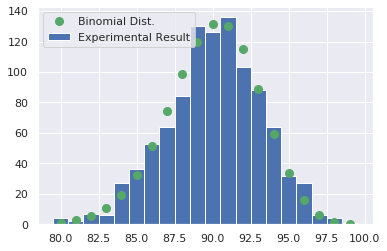

In [0]:
# Define the number of trials, probability of success, and number of experiments to run
num_trials = 100
p_success = 0.9
num_experiments = 1000
# Run binary experiments using the parameters defined above
n_success = np.random.binomial(num_trials, p_success, size=num_experiments)
# Generate x-values to use in calculating a theoretical geometric distribution
x = np.arange(np.min(n_success), np.max(n_success)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = np.append(x-0.5, x[-1]+0.5)
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(n_success, bins=bin_edges, label='Experimental Result')
# Plot the theoretical result from a binomial distribution (green dots)
plt.plot(x, stats.binom.pmf(x, num_trials, p_success)*num_experiments, 'go', ms=8, label='Binomial Dist.')
plt.legend()
plt.show()

**Step 3:** Compare the result of running multiple binary experiments with the theoretical result computed using the binomial distribution for a specified range of values.

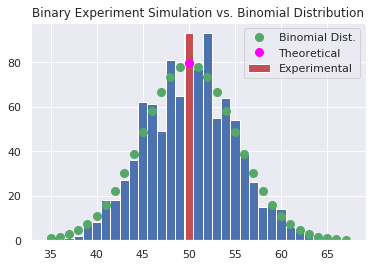

The experimental probability of n successes equal to 50 is 0.093
The theoretical probability of n successes equal to 50 is 0.080


In [0]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_n_successes(n_to_compare=50, comparison='equal', experiments=1000, trials=100, success=0.5):
  # Run binary experiments
  n_success = np.random.binomial(trials, success, size=experiments)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(np.min(n_success), np.max(n_success)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(n_success, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.binom.pmf(x, trials, success)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Binomial Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Binary Experiment Simulation vs. Binomial Distribution')
  plt.show()
    # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n successes {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n successes {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

  return

# Run the new function to test
compare_n_successes()

**Step 4:** Try running the comparison for different input parameters.

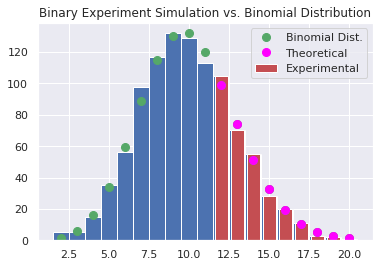

The experimental probability of n successes greater than or equal to 12 is 0.295
The theoretical probability of n successes greater than or equal to 12 is 0.296


In [0]:
# Define parameters to use in the comparison of simulated vs. theoretical number of successes
n = 12
compare = 'greater than or equal'
n_exp = 1000
n_trials = 100
p_success = 0.1
# Run the experiment
compare_n_successes(n_to_compare=n, 
                    comparison=compare, 
                    experiments=n_exp, 
                    trials=n_trials, 
                    success=p_success)

### **Learning objective 3:** Simulate an experiment to find the probability associated with the number of trials to reach the first success and compare with the result computed using the geometric distribution.
**Step 1:** Write a function to simulate a geometric experiment that records the number of trials to reach the first success.

In [0]:
# Run a single geometric experiment with probability of success = 0.05
np.random.geometric(0.05)

4

**Step 2:** Write a function to run multiple geometric experiments and record the results of each.

In [0]:
# Run a single geometric experiment with probability of success = 0.05
np.random.geometric(0.1, size=10)

array([ 6,  2,  4,  7,  4,  9, 14,  9,  6,  2])

**Step 3:** Plot up a histogram of the result of running multiple geometric experiments and compare with the theoretical result computed using the geometric distribution.

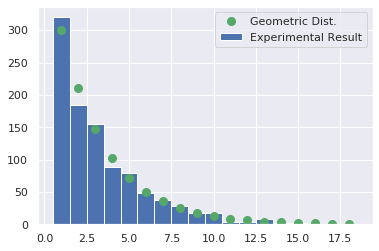

In [0]:
# Define parameters for the number of experiments to run and probability of success
n_experiments = 1000
p_success = 0.3
# Run geometric experiments with these parameters
count_to_success = np.random.geometric(p_success, size=n_experiments)
# Generate x-values to use in calculating a theoretical geometric distribution
x = np.arange(1, np.max(count_to_success)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = np.append(x-0.5, x[-1]+0.5)
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(count_to_success, bins=bin_edges, label='Experimental Result')
# Plot the theoretical result from a geometric distribution (green dots)
plt.plot(x, stats.geom.pmf(x, p_success)*n_experiments, 'go', ms=8, label='Geometric Dist.')
plt.legend()
plt.show()

**Step 4:** Compare the result of running multiple binary experiments with the theoretical result computed using the geometric distribution for a specified range of values.

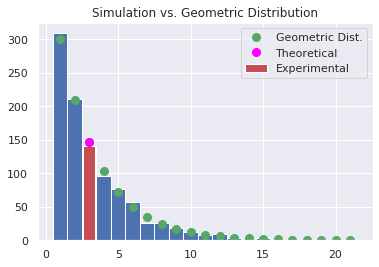

The experimental probability of n trials to successe equal to 3 is 0.140
The theoretical probability of n trials to successe equal to 3 is 0.147


In [0]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_trials_to_success(n_to_compare=3, comparison='equal', experiments=1000, success=0.3):
  # Run geometric experiments
  #count_to_success = multiple_geometric(experiments=experiments, 
  #                                      success=success)
  count_to_success = np.random.geometric(success, size=experiments)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(1, np.max(count_to_success)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(count_to_success, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.geom.pmf(x, success)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Geometric Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Simulation vs. Geometric Distribution')
  plt.show()
    # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n trials to successe {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n trials to successe {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

# Run the new function to test
compare_trials_to_success()

**Step 5:** Try running the comparison for different input parameters.

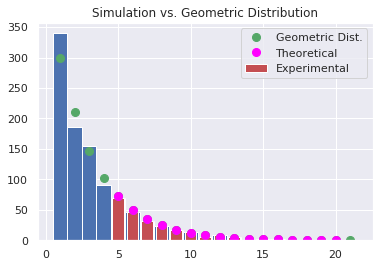

The experimental probability of n trials to successe greater than or equal to 5 is 0.227
The theoretical probability of n trials to successe greater than or equal to 5 is 0.239


In [0]:
# Define parameters to use in the comparison of simulated and theoretical number of trials to reach first success
n = 5
compare = 'greater than or equal'
n_exp = 1000
p_success = 0.3
# Run the comparison
compare_trials_to_success(n_to_compare=n, 
                          comparison=compare, 
                          experiments=n_exp, 
                          success=p_success)

### **Learning objective 4:** Simulate the probability of recording a given number of events in an interval or region and compare the result with the probability computed directly using the Poisson distribution.
**Step 1:** Write a function to simulate a Poisson experiment that records the number of successes over an interval.

In [0]:
# Run a single Poisson experiment for a given value of lambda
np.random.poisson(10)

11

**Step 2:** Write a function to run multiple Poisson experiments and record the results of each.

In [0]:
# Run multiple Poisson experiments
np.random.poisson(10, 10)

array([ 6,  8, 10, 10, 11,  9, 13, 10,  6,  7])

**Step 3:** Plot up a histogram of the result of running multiple Poisson experiments and compare with the theoretical result computed using the Poisson distribution.

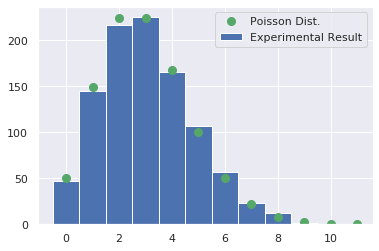

In [0]:
# Define parameters for the number of experiments to run, number of subintervals and successes per interval
n_experiments=1000
n_intervals=1
p_lambda=3
# Run the experiments and record the result
exp_lambda = p_lambda*n_intervals
n_successes = np.random.poisson(exp_lambda, n_experiments)
# Generate x-values to use in calculating a theoretical Poisson distribution
x = np.arange(np.min(n_successes), np.max(n_successes)+1)
# Use the x-values to define bins to be used for a histogram of experimental data
bin_edges = x - 0.5
# Compute and plot a histogram of experimental results (blue bars)
plt.hist(n_successes, bins=bin_edges, label='Experimental Result')
# Plot the theoretical result from a Poisson distribution (green dots)
plt.plot(x, stats.poisson.pmf(x, exp_lambda)*n_experiments, 'go', ms=8, label='Poisson Dist.')
plt.legend()
plt.show()

**Step 4:** Compare the result of running multiple Poisson experiments with the theoretical result computed using the Poisson distribution for a specified range of values.

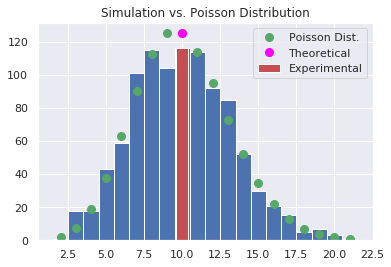

The experimental probability of n events in the interval being equal to 10 is 0.116
The theoretical probability of n events in the interval being equal to 10 is 0.125


In [0]:
# Write a function to compare an experimental result for some number of successes
# with the theoretical result from a binomial distribution
def compare_n_over_interval(n_to_compare=10, comparison='equal', experiments=1000, 
                            intervals=1, 
                            poisson_lambda=10):
  # Run the experiments
  exp_lambda = poisson_lambda*intervals
  n_successes = np.random.poisson(exp_lambda, n_experiments)
  # Generate x-values to use in calculating a theoretical geometric distribution
  x = np.arange(np.min(n_successes), np.max(n_successes)+1)
  # Use the x-values to define bins to be used for a histogram of experimental data
  bin_edges = np.append(x-0.5, x[-1]+0.5)
  # Compute and plot a histogram of experimental results (blue bars)
  hist = plt.hist(n_successes, bins=bin_edges)
  # Plot the theoretical result from a binomial distribution (green dots)
  theoretical_result = stats.poisson.pmf(x, exp_lambda)
  plt.plot(x, theoretical_result*experiments, 'go', ms=8, label='Poisson Dist.')

  # Check if the number requested for comparison exists in the array of x-values
  if n_to_compare not in list(x):
    print('The number of successes for comparison is not within the experimental results.')
    print(f'Try again with one of these numbers:{x}')
    return
  # Check to see if the type of comparison requested is valid
  compare_options = ['equal', 'less than or equal', 'greater than or equal']
  if comparison not in compare_options:
    print(f'{comparison} is not an option for comparison')
    print(f'Try again with one of these:{compare_options}')
    return
  # Extract the array of experimental counts
  experimental_counts = hist[0]
  # Extract the indices for comparison
  if comparison == 'equal':
    ind = (x == n_to_compare).nonzero()[0]
  if comparison == 'less than or equal':
    ind = (x <= n_to_compare).nonzero()[0]
  if comparison == 'greater than or equal':
    ind = (x >= n_to_compare).nonzero()[0]
  # Compute the fraction of counts (probability) for that value(s) in the experiment
  experimental_probability = np.sum(experimental_counts[ind])/np.sum(experimental_counts)
  theoretical_probability = np.sum(theoretical_result[ind])
  # Plot the experimental and theoretical comparison
  plt.bar(x[ind], experimental_counts[ind], color='r', label='Experimental')
  plt.plot(x[ind], theoretical_result[ind]*experiments, color='magenta', marker='o', ms=8, ls='None', label='Theoretical')
  plt.legend()
  plt.title('Simulation vs. Poisson Distribution')
  plt.show()
  # Compute the theoretical probability of that exact result using the binomial distribution
  print(f'The experimental probability of n events in the interval being {comparison} to {n_to_compare} is {experimental_probability:.3f}') 
  print(f'The theoretical probability of n events in the interval being {comparison} to {n_to_compare} is {theoretical_probability:.3f}')

  return

# Run the new function to test
compare_n_over_interval()

**Step 5:** Try running the comparison for different input parameters.

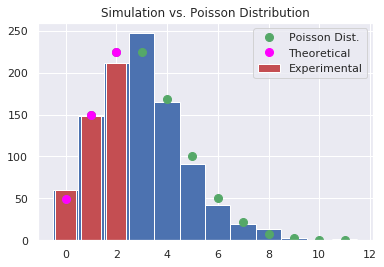

The experimental probability of n events in the interval being less than or equal to 2 is 0.419
The theoretical probability of n events in the interval being less than or equal to 2 is 0.423


In [0]:
# Define parameters to use in the comparison of simulated and theoretical number of events per interval
n = 2
compare = 'less than or equal'
n_exp = 1000
n_ints = 1
p_lambda = 3
# Run the comparison
compare_n_over_interval(n_to_compare=n, 
                        comparison=compare, 
                        experiments=n_exp,  
                        intervals=n_ints, 
                        poisson_lambda=p_lambda)

### Compare two binomial distributions (A/B Test Simulator)

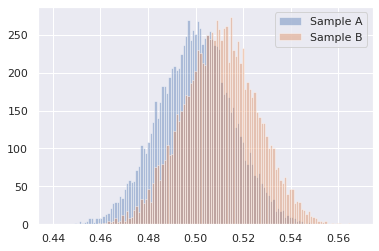

In [0]:
# Define the sample size 
sample_size = 1000
experiments = 10000
# Define the conversion rate for the A sample
conversion_rate_a = 0.5
# Define the conversion rate for the A sample
conversion_rate_b = 0.51
# Simulate a binomial distribution for sample A
n_success_a = np.random.binomial(sample_size, conversion_rate_a, size=experiments)
# Generate x-values to use in calculating a theoretical geometric distribution for sample A
x_a = np.arange(np.min(n_success_a), np.max(n_success_a)+1)
# Compute and plot a histogram of the Sample A distribution
sns.distplot(n_success_a/sample_size, bins=len(x_a), label='Sample A', kde=False)
# Simulate a binomial distribution for sample B
n_success_b = np.random.binomial(sample_size, conversion_rate_b, size=experiments)
# Generate x-values to use in calculating a theoretical geometric distribution for sample A
x_b = np.arange(np.min(n_success_b), np.max(n_success_b)+1)
# Compute and plot a histogram of the Sample B distribution
sns.distplot(n_success_b/sample_size, bins=len(x_b), label='Sample B', kde=False)
plt.legend()
plt.show()